<a href="https://colab.research.google.com/github/BoddiReddyShivani/batch-45-46/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,parser='auto')

In [82]:
type(car_data)

sklearn.utils._bunch.Bunch

In [83]:
car_data.details['version']

'2'

In [84]:
# Data description

print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [85]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [86]:
# Getting the whole dataframe

car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [87]:
type(car_data)

pandas.core.frame.DataFrame

In [88]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))



The size of training data is: 1555 
The size of testing data is: 173


In [89]:
# Checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,2
top,med,low,2,2,med,low,P
freq,402,392,393,521,522,528,1097


In [90]:
# Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [91]:
train_data['buying'].value_counts()

,count
buying,
med,402
vhigh,387
high,385
low,381


<Axes: xlabel='buying', ylabel='count'>

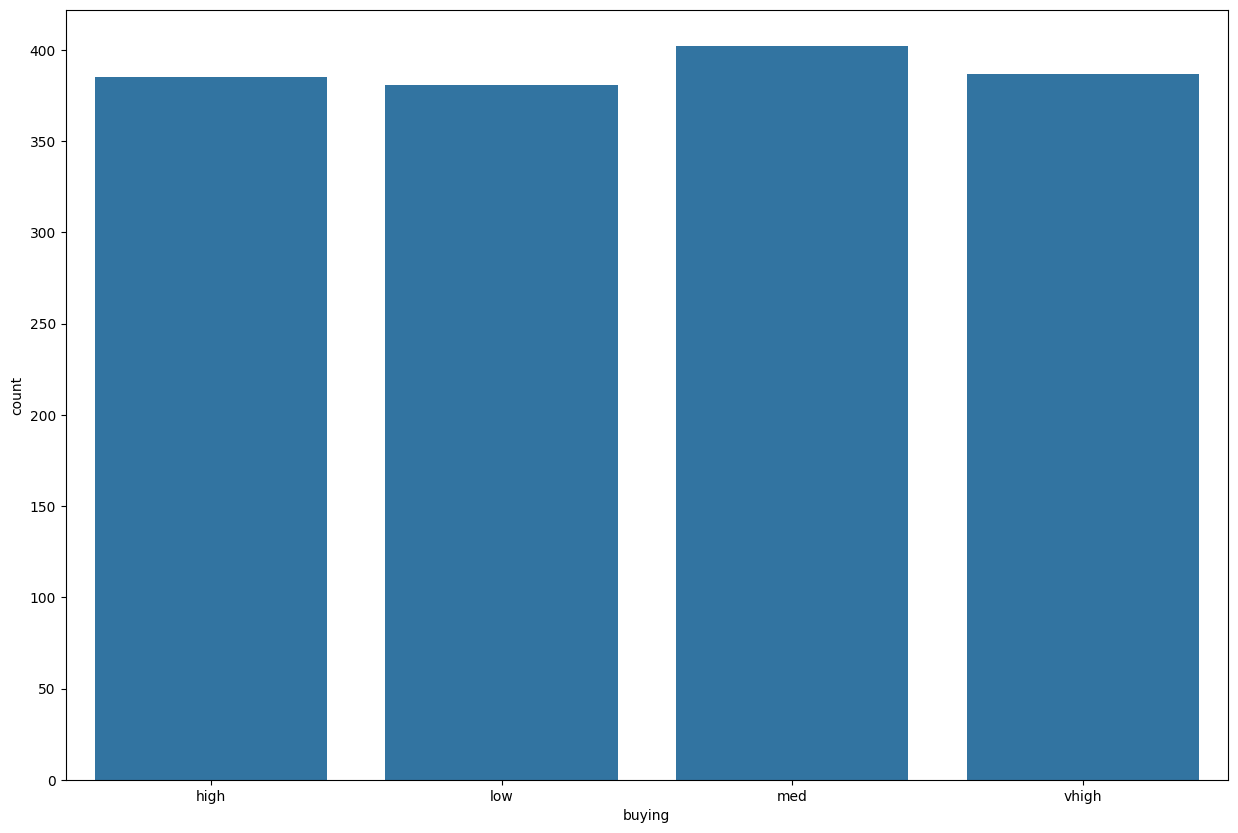

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

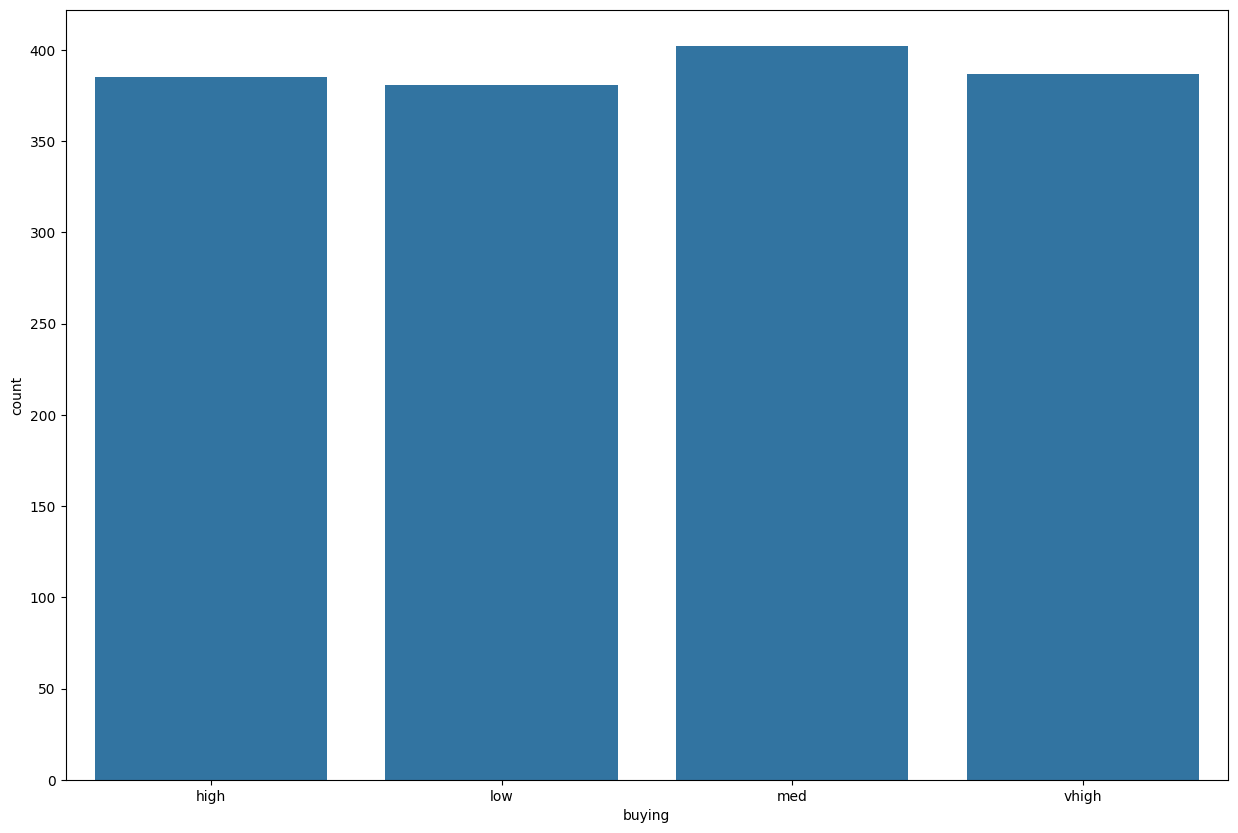

In [93]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

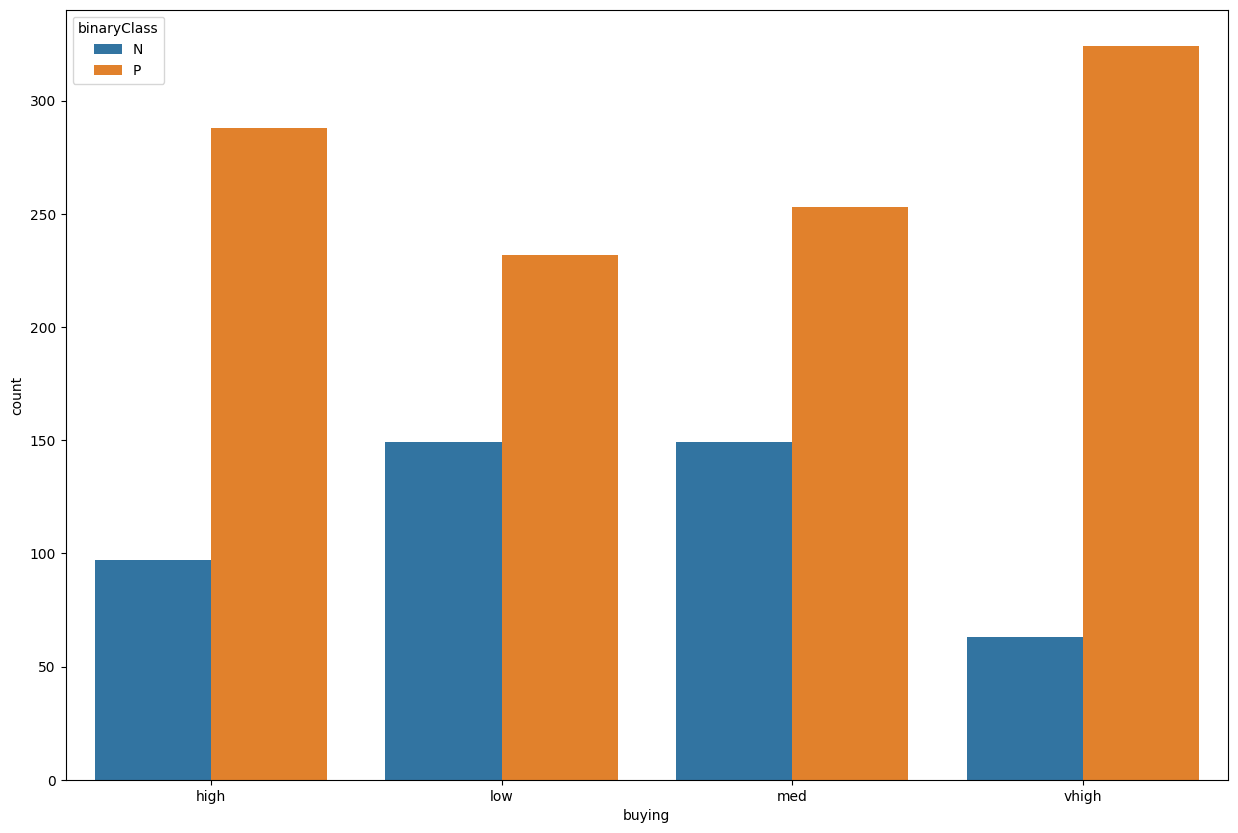

In [94]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [95]:
train_data['maint'].value_counts()

,count
maint,
low,392
med,390
high,387
vhigh,386


<Axes: xlabel='maint', ylabel='count'>

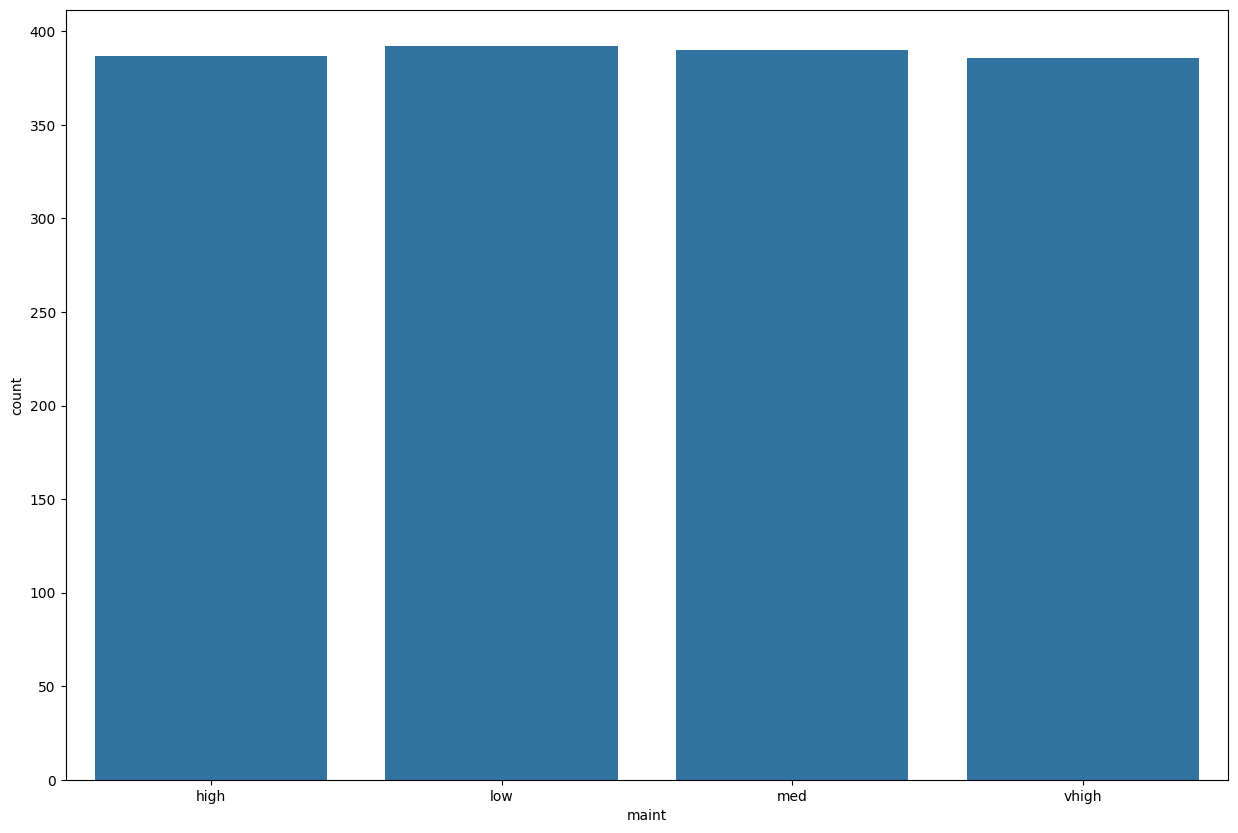

In [96]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

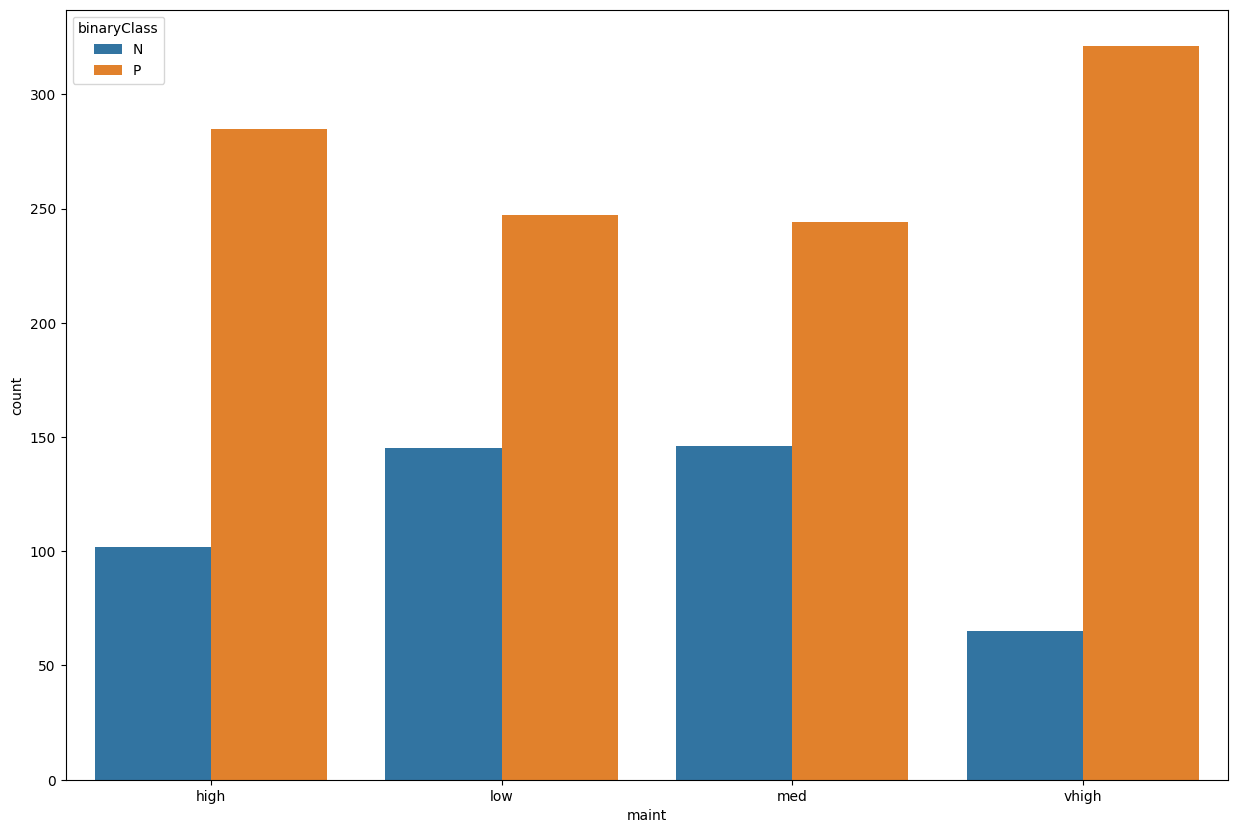

In [97]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [98]:
train_data['doors'].value_counts()

,count
doors,
2,393
4,393
5more,389
3,380


<Axes: xlabel='doors', ylabel='count'>

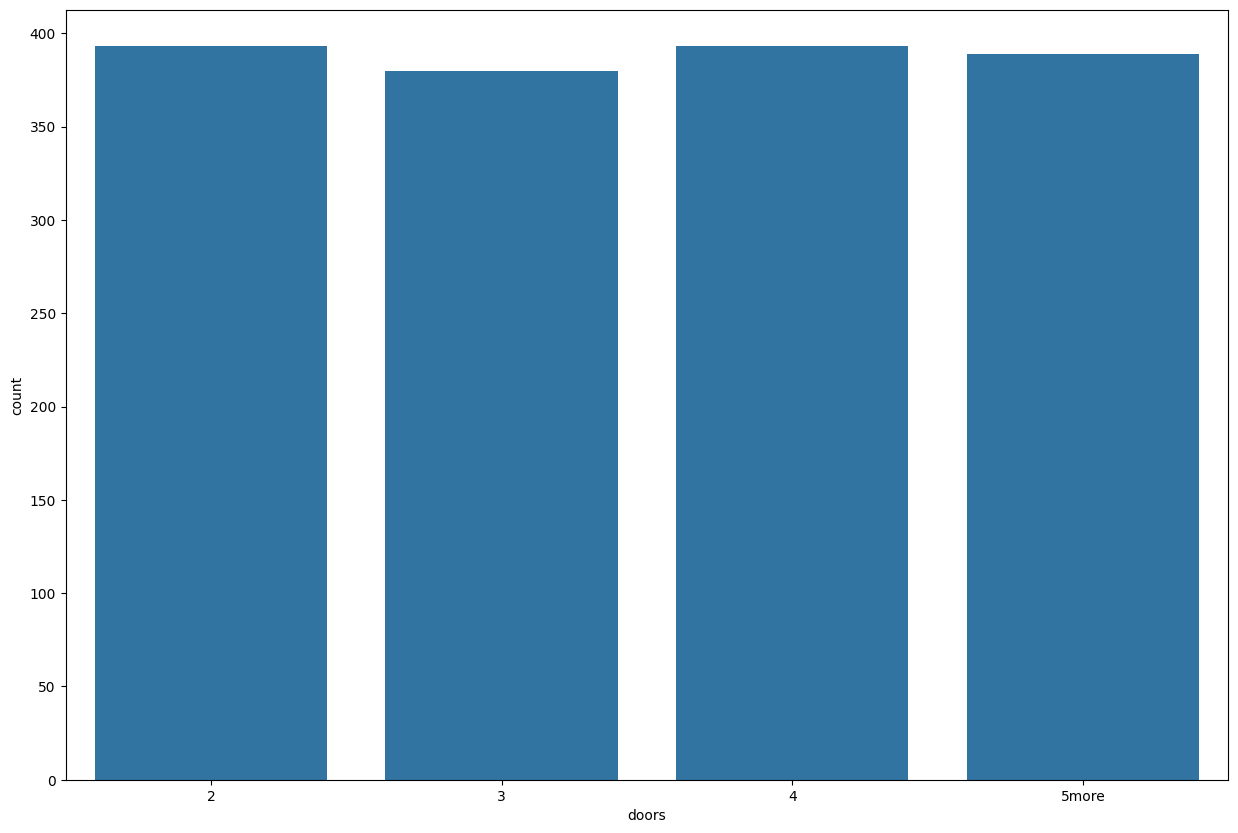

In [99]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

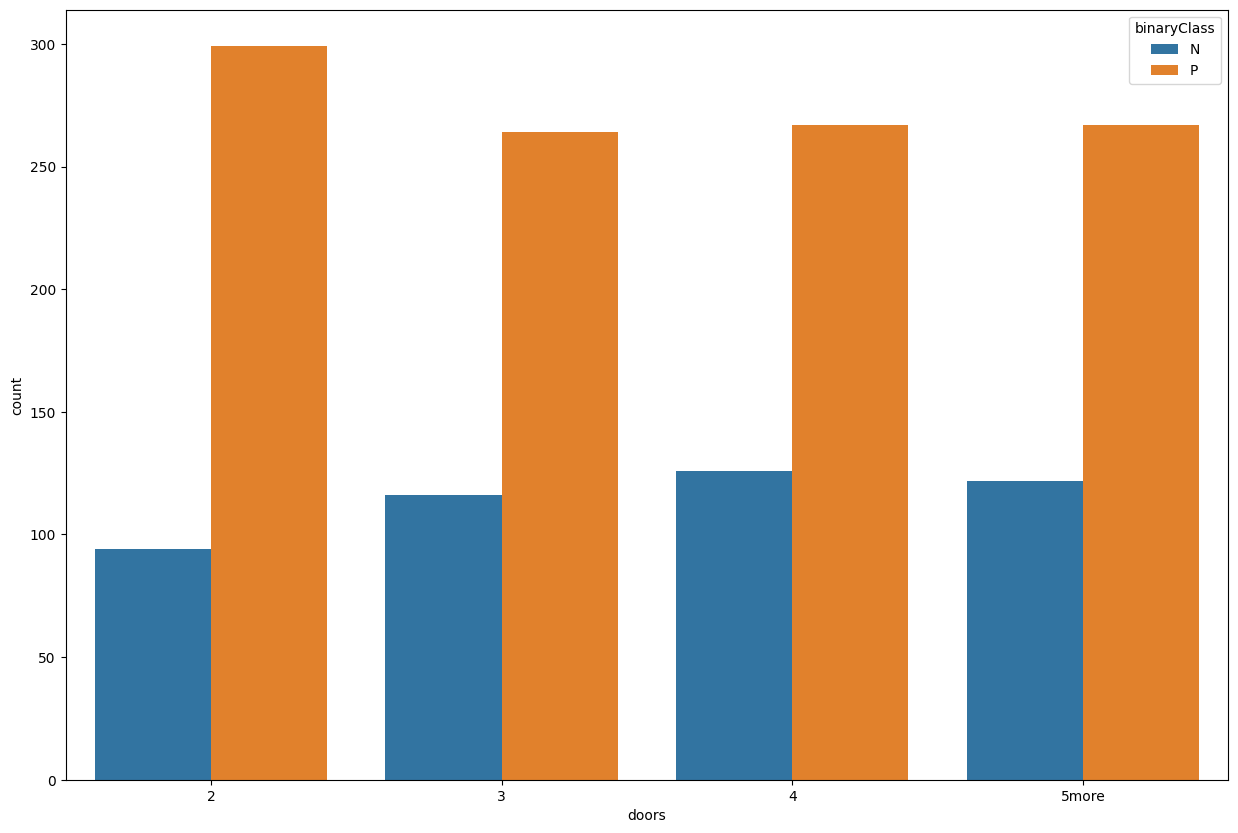

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [101]:
train_data['persons'].value_counts()

,count
persons,
2,521
more,521
4,513


<Axes: xlabel='persons', ylabel='count'>

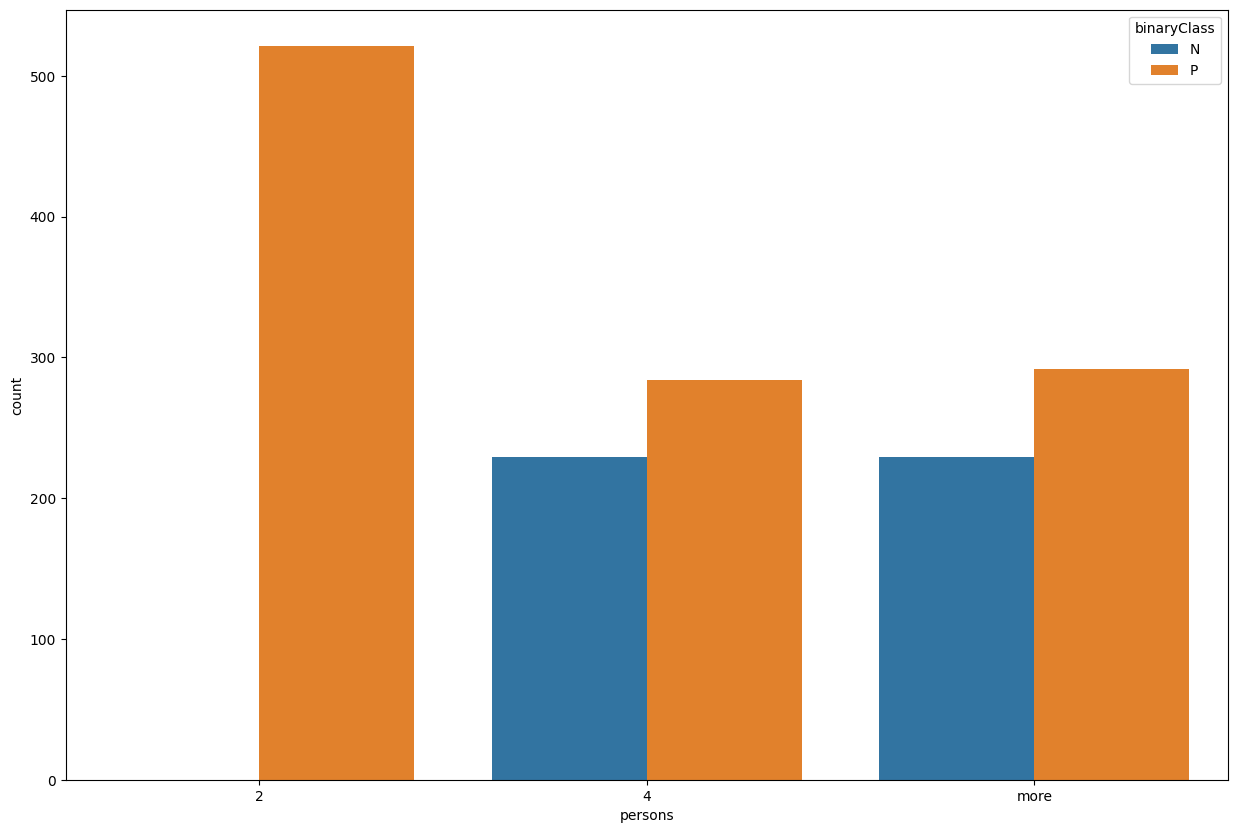

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [103]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
med,522
small,517
big,516


<Axes: xlabel='lug_boot', ylabel='count'>

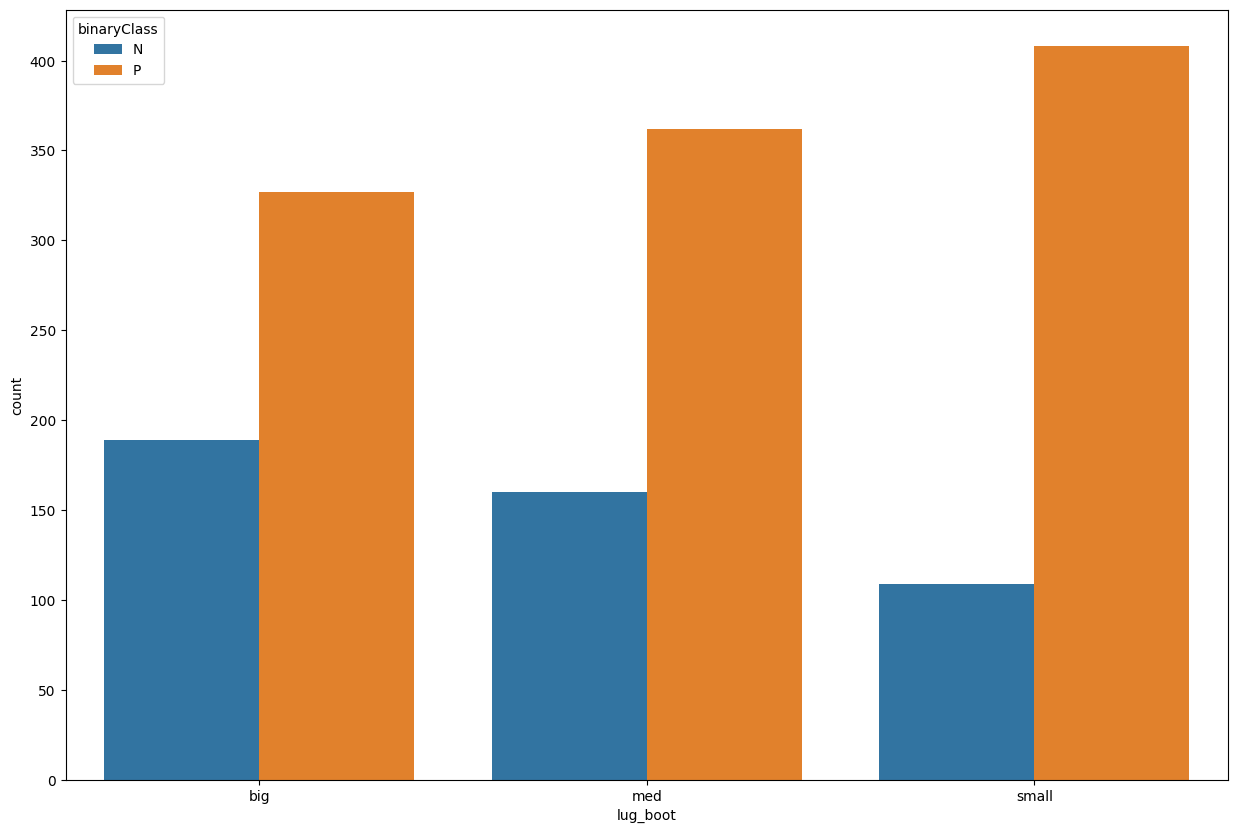

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [105]:
train_data['safety'].value_counts()

,count
safety,
low,528
high,514
med,513


<Axes: xlabel='safety', ylabel='count'>

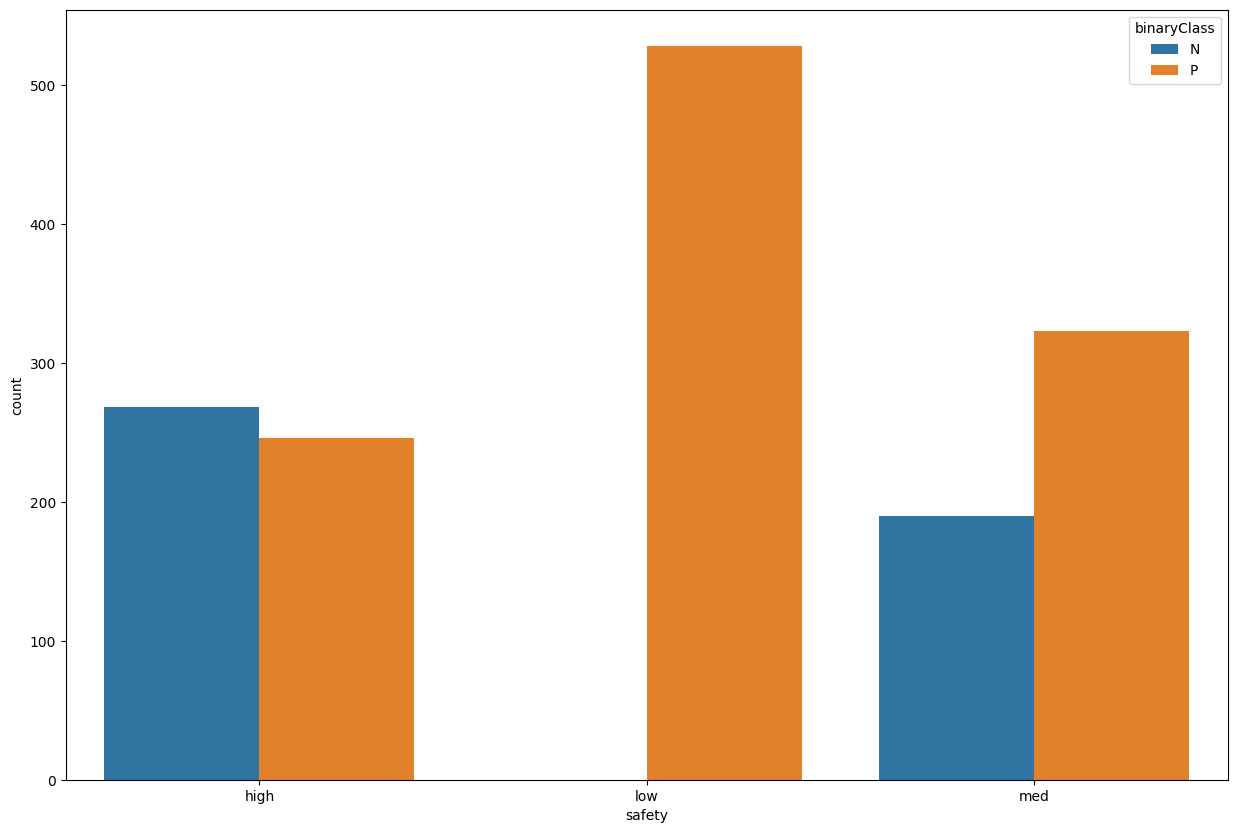

In [106]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [107]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,1097
N,458


<Axes: xlabel='binaryClass', ylabel='count'>

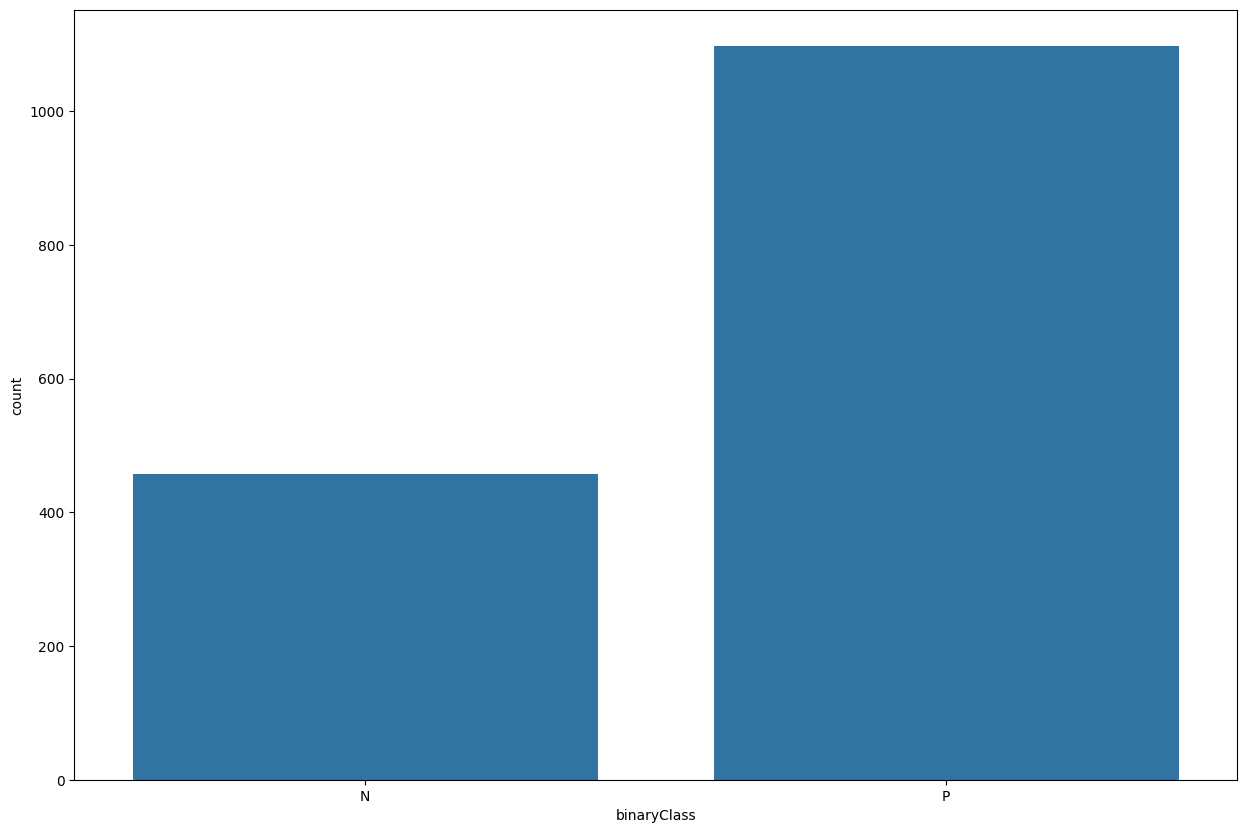

In [108]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

In [109]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [110]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())

])

car_train_prepared = pipe.fit_transform(car_train)

In [111]:
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

In [112]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [113]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)

    return acc

from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)

    return report

from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

In [114]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[ 458,    0],
       [   0, 1097]])

In [115]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555



In [116]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(2, 10)),
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3],
               'max_depth':[2,3,4,5],
               'max_features':[2,3,4,5],
              'ccp_alpha':[0.0,0.1,0.5,1.0]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [118]:
grid_search.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [119]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       max_leaf_nodes=9, random_state=42)

In [120]:
tree_best = grid_search.best_estimator_


car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

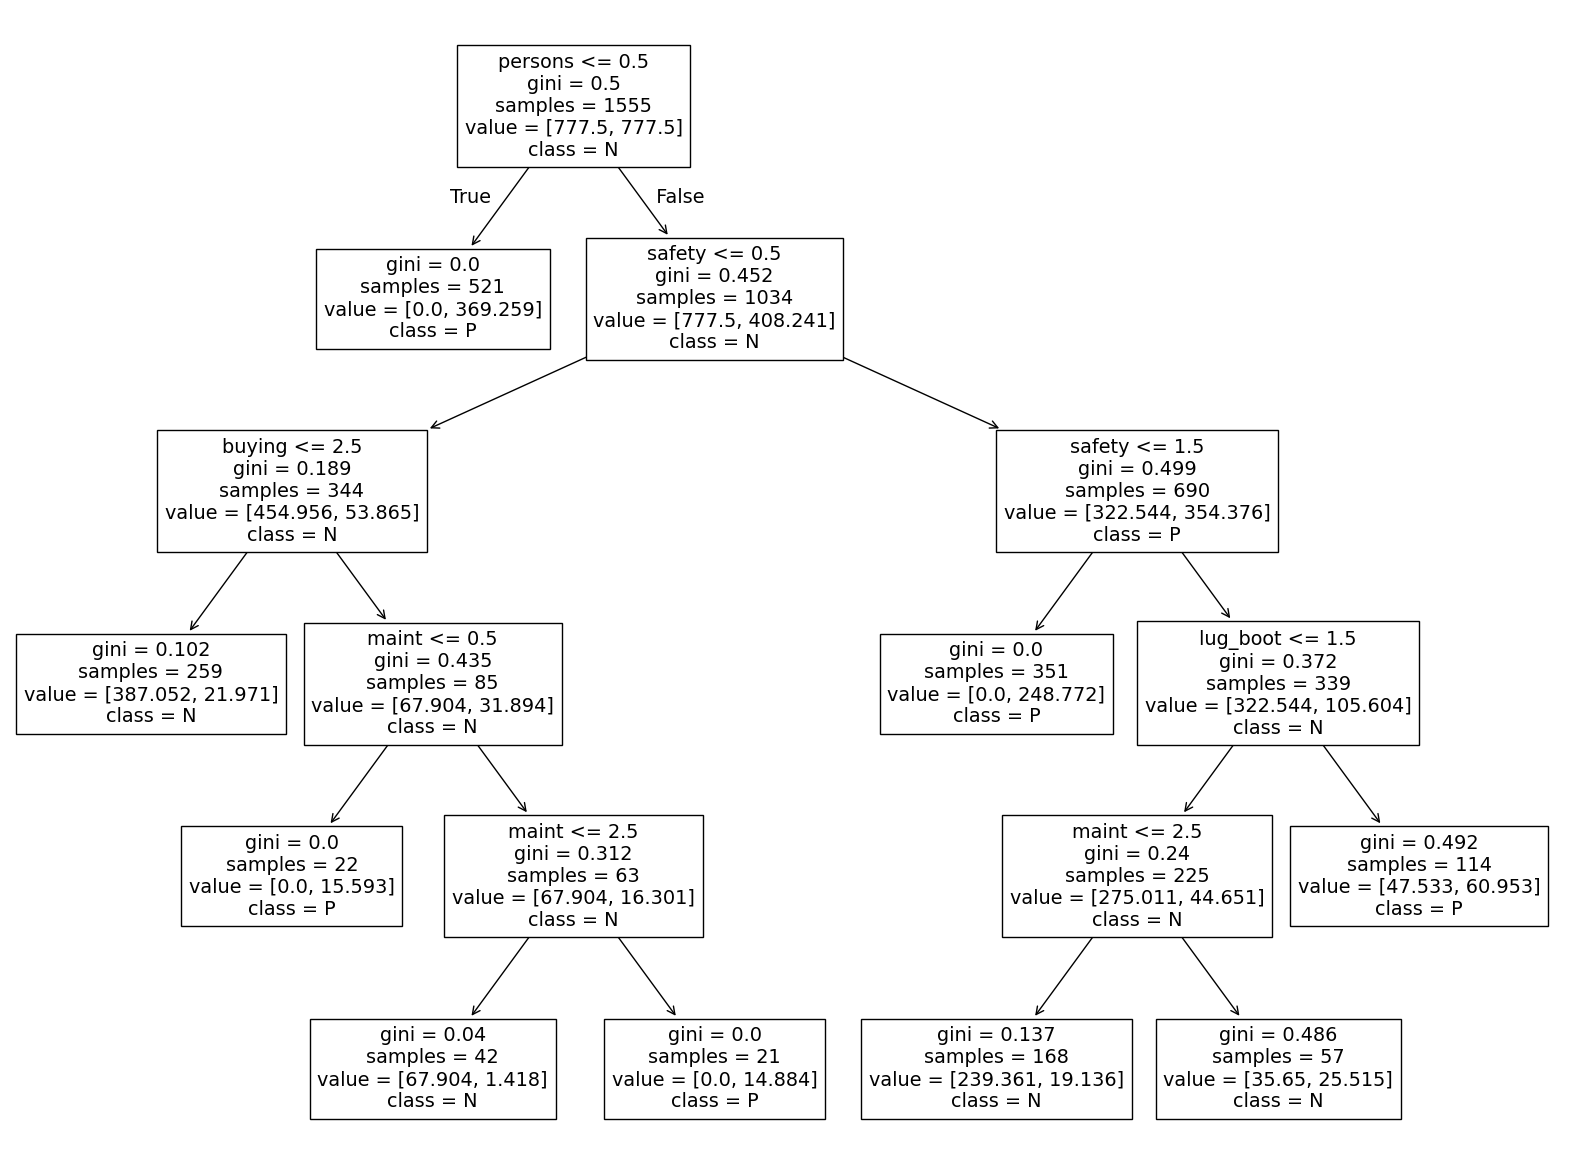

In [121]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [122]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)

0.9202572347266881

In [123]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)

array([[ 430,   28],
       [  96, 1001]])

In [124]:
class_report(car_train_prepared, tree_best, car_labels_prepared)

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       458
           1       0.97      0.91      0.94      1097

    accuracy                           0.92      1555
   macro avg       0.90      0.93      0.91      1555
weighted avg       0.93      0.92      0.92      1555



In [125]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [126]:
car_test_prepared = pipe.transform(car_test)

In [127]:
car_test_labels_prepared = label_enc.transform(car_test_labels)

In [128]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.884393063583815

In [129]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

array([[ 53,   7],
       [ 13, 100]])

In [130]:
class_report(car_test_prepared, tree_best, car_test_labels_prepared)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        60
           1       0.93      0.88      0.91       113

    accuracy                           0.88       173
   macro avg       0.87      0.88      0.88       173
weighted avg       0.89      0.88      0.89       173

